<a href="https://colab.research.google.com/github/Gabe-Pasqual/time_series_forecasting/blob/main/prev_acoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
(95, 2)
  mes_ano  fechamento
0  1/2015       29.29
1  2/2015       32.12
2  3/2015       31.11
3  4/2015       31.29
4  5/2015       32.57


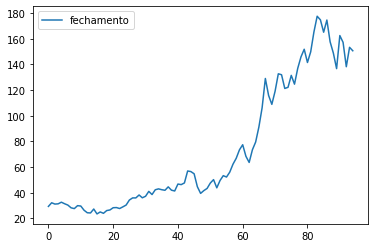

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  153.381032  137.710572  167.811697
1 2022-02-01  153.076866  138.371926  165.338653
2 2022-03-01  155.705911  142.101158  169.746108
3 2022-04-01  155.881391  142.479067  169.328790
4 2022-05-01  155.553120  140.926014  169.405770


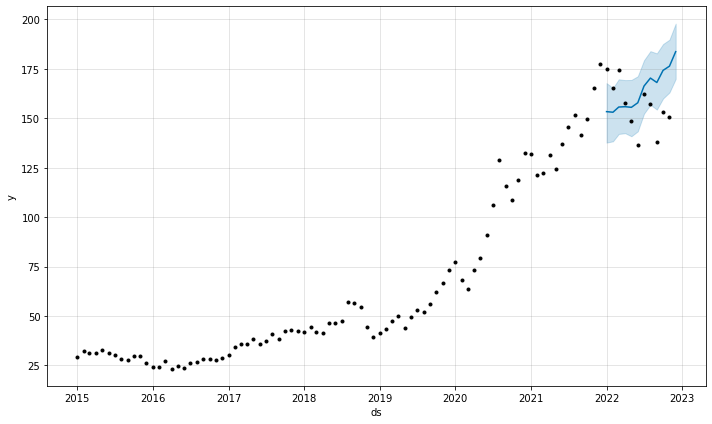

In [11]:
!pip install pystan~=2.14
!pip install fbprophet
#!pip install localpip 
#!localpip install fbprophet
# print version number
#print('Prophet %s' % prophet.__version__)

# carregar base de dados histórica das ações
from pandas import read_csv
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)
print(df.shape)

# teste tabela e gráfico
print(df.head())
from pandas import read_csv
from matplotlib import pyplot
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)
df.plot()
pyplot.show()

# bibliotecas para o forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

# carregando base histórica
path = 'https://raw.githubusercontent.com/Gabe-Pasqual/time_series_forecasting/main/DataBase_Investing.csv'
df = read_csv(path, header=0)

# propriedades do dataset
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
model = Prophet()
model.fit(df)
future = list()
for i in range(1, 13):
	date = '2022-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

# função de previsão usando o modelo de dados
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# mostrar forecast no gráfico
model.plot(forecast)
pyplot.show()